In [25]:
from ps_utils import *
import numpy as np
import numpy.linalg as lin
import matplotlib.pyplot as plt
import scipy.io as sio
plt.rcParams['figure.figsize'] = (20.0, 15.0)

In [2]:
beethoven = sio.loadmat('Beethoven.mat')
buddha = sio.loadmat('Buddha.mat')

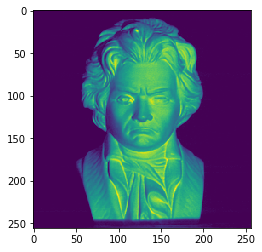

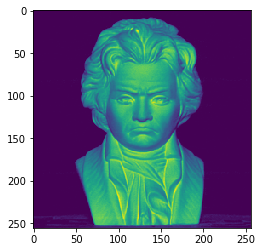

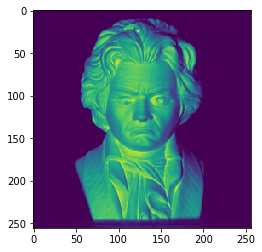

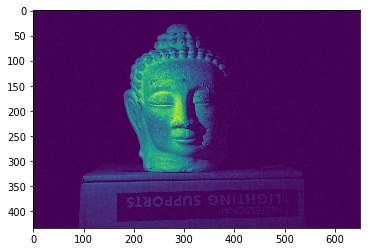

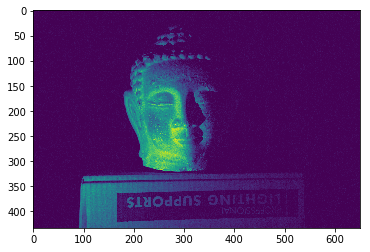

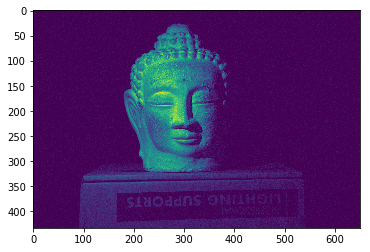

In [3]:
plt.imshow(beethoven['I'][:,:,0])
plt.show()
plt.imshow(beethoven['I'][:,:,1])
plt.show()
plt.imshow(beethoven['I'][:,:,2])
plt.show()

plt.imshow(buddha['I'][:,:,0])
plt.show()
plt.imshow(buddha['I'][:,:,1])
plt.show()
plt.imshow(buddha['I'][:,:,2])
plt.show()

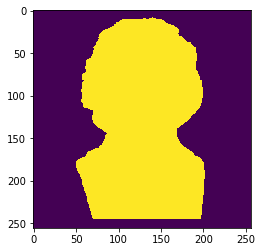

In [4]:
buddha['mask'].shape
buddha['S']

plt.imshow(beethoven['mask'])
plt.show()

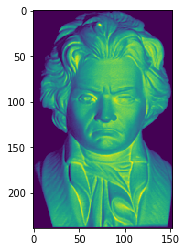

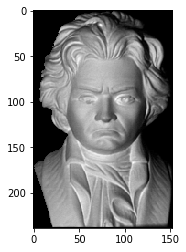

In [5]:
mask = beethoven["mask"][8:247,49:202]
beetm = beethoven["I"][8:247,49:202,:]

bboy = np.stack([beetm[:,:,0]*mask,beetm[:,:,1]*mask,beetm[:,:,2]*mask], axis=0)
bboy.shape
plt.imshow(bboy[0])
plt.show()
plt.imshow(bboy[2], 'gray')
plt.show()

In [6]:
S = beethoven['S']
image_shape = bboy[0].shape
bboy = np.reshape(bboy, (3,36567))

S = lin.inv(S)


dotpd = np.dot(S, bboy)
p = lin.norm(dotpd, axis=0)
N = dotpd / p

output = []

N = np.reshape(N, (3,image_shape[0],image_shape[1]))
print(N.shape, N.size)
output.append(N)

(3, 239, 153) 109701


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


(239, 153)


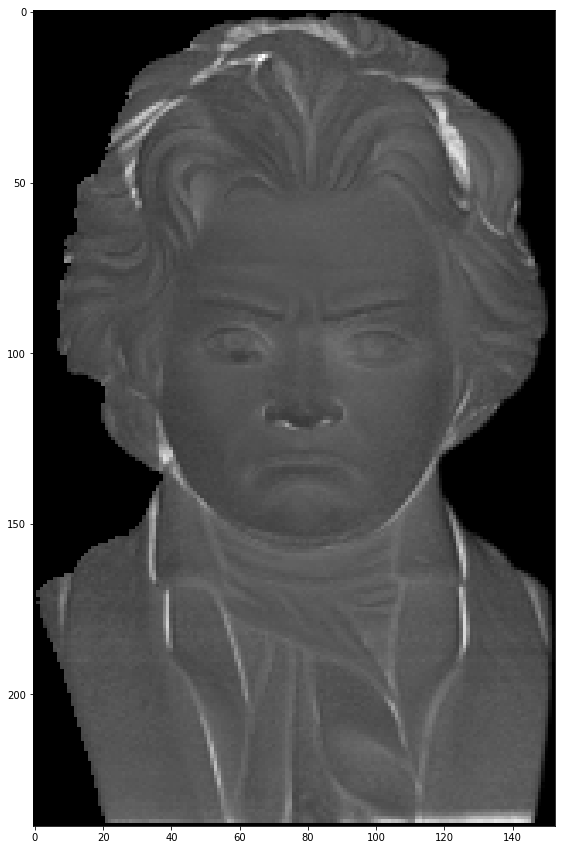

In [27]:
p = p.reshape(image_shape)
print(p.shape)
plt.imshow(p, 'gray')
plt.show()

/usr/local/lib/python3.6/site-packages/matplotlib/colors.py:489: RuntimeWarning: invalid value encountered in less
  np.copyto(xa, -1, where=xa < 0.0)
/usr/local/lib/python3.6/site-packages/matplotlib/colors.py:217: RuntimeWarning: invalid value encountered in less
  if np.any((result < 0) | (result > 1)):
/usr/local/lib/python3.6/site-packages/matplotlib/colors.py:217: RuntimeWarning: invalid value encountered in greater
  if np.any((result < 0) | (result > 1)):


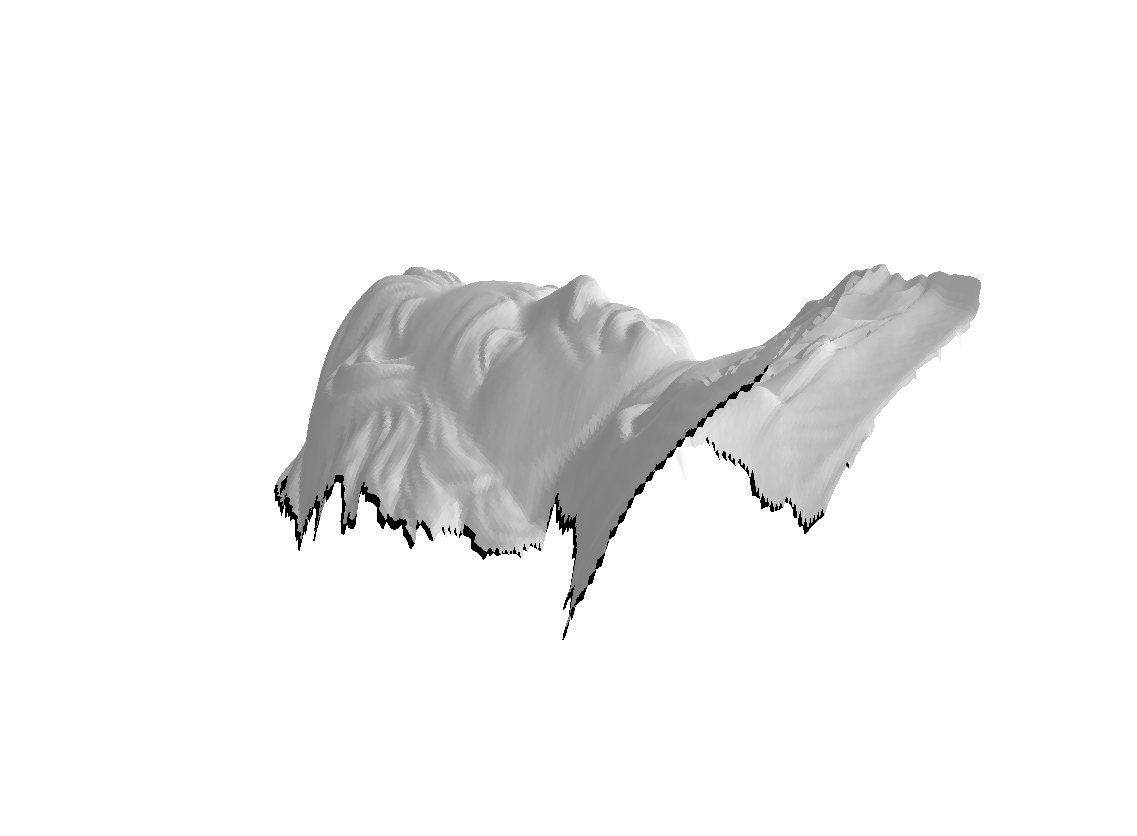

In [28]:
output_out = unbiased_integrate(N[0], N[1], N[2], mask, order=2)
display_depth_matplotlib(output_out)


/usr/local/lib/python3.6/site-packages/matplotlib/colors.py:489: RuntimeWarning: invalid value encountered in less
  np.copyto(xa, -1, where=xa < 0.0)
/usr/local/lib/python3.6/site-packages/matplotlib/colors.py:217: RuntimeWarning: invalid value encountered in less
  if np.any((result < 0) | (result > 1)):
/usr/local/lib/python3.6/site-packages/matplotlib/colors.py:217: RuntimeWarning: invalid value encountered in greater
  if np.any((result < 0) | (result > 1)):


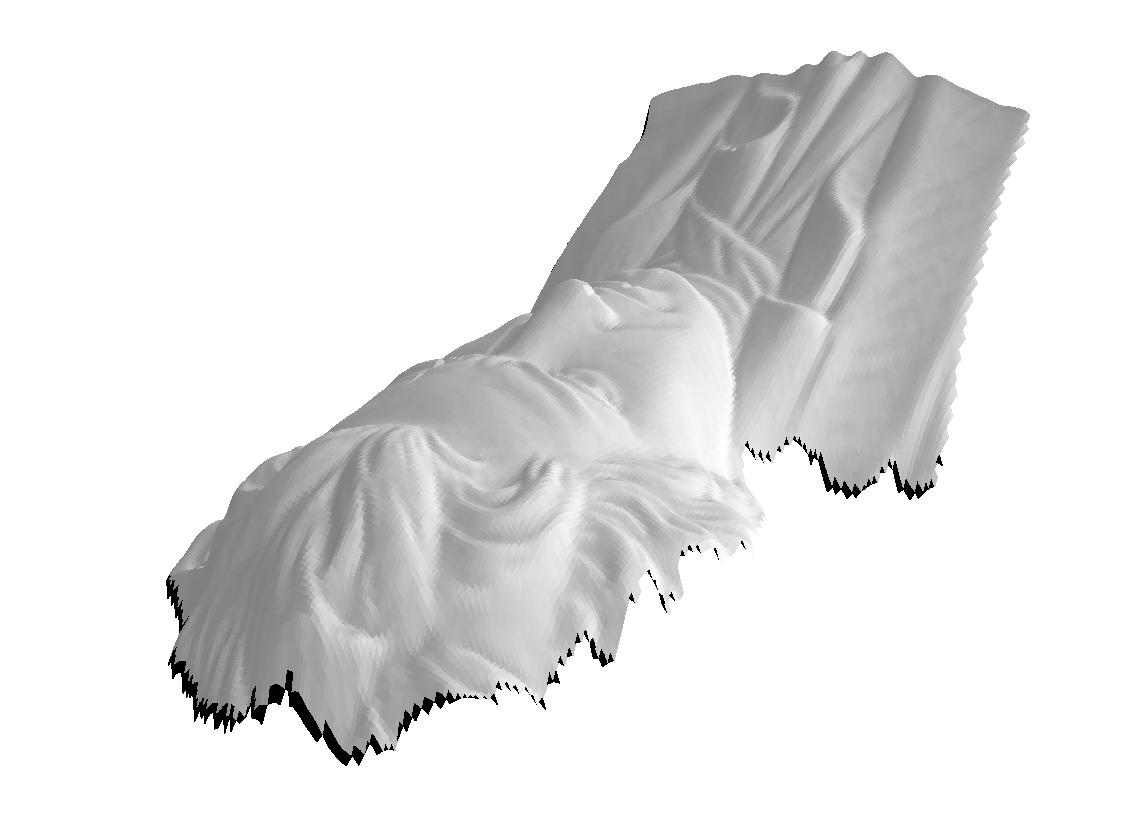

In [29]:
display_depth_matplotlib(np.rot90(output_out))

/usr/local/lib/python3.6/site-packages/matplotlib/colors.py:489: RuntimeWarning: invalid value encountered in less
  np.copyto(xa, -1, where=xa < 0.0)
/usr/local/lib/python3.6/site-packages/matplotlib/colors.py:217: RuntimeWarning: invalid value encountered in less
  if np.any((result < 0) | (result > 1)):
/usr/local/lib/python3.6/site-packages/matplotlib/colors.py:217: RuntimeWarning: invalid value encountered in greater
  if np.any((result < 0) | (result > 1)):


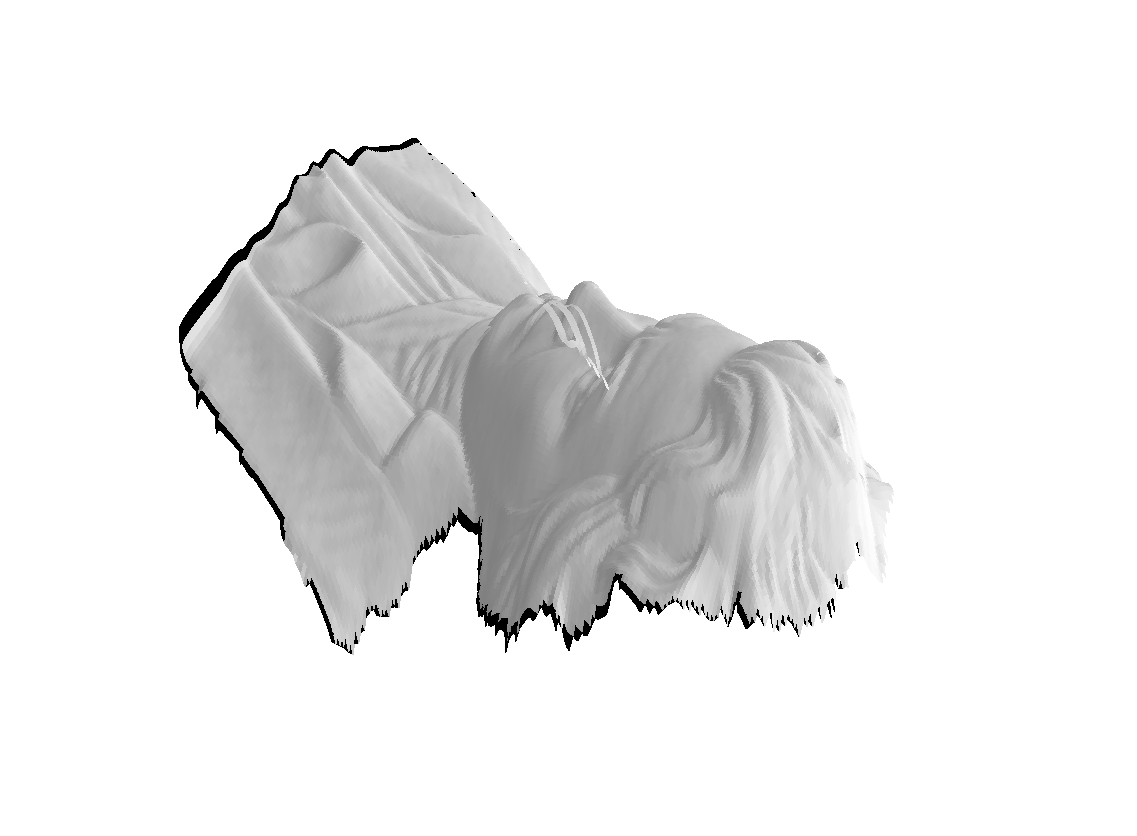

In [30]:
display_depth_matplotlib(np.rot90(np.rot90(output_out)))

/usr/local/lib/python3.6/site-packages/matplotlib/colors.py:489: RuntimeWarning: invalid value encountered in less
  np.copyto(xa, -1, where=xa < 0.0)
/usr/local/lib/python3.6/site-packages/matplotlib/colors.py:217: RuntimeWarning: invalid value encountered in less
  if np.any((result < 0) | (result > 1)):
/usr/local/lib/python3.6/site-packages/matplotlib/colors.py:217: RuntimeWarning: invalid value encountered in greater
  if np.any((result < 0) | (result > 1)):


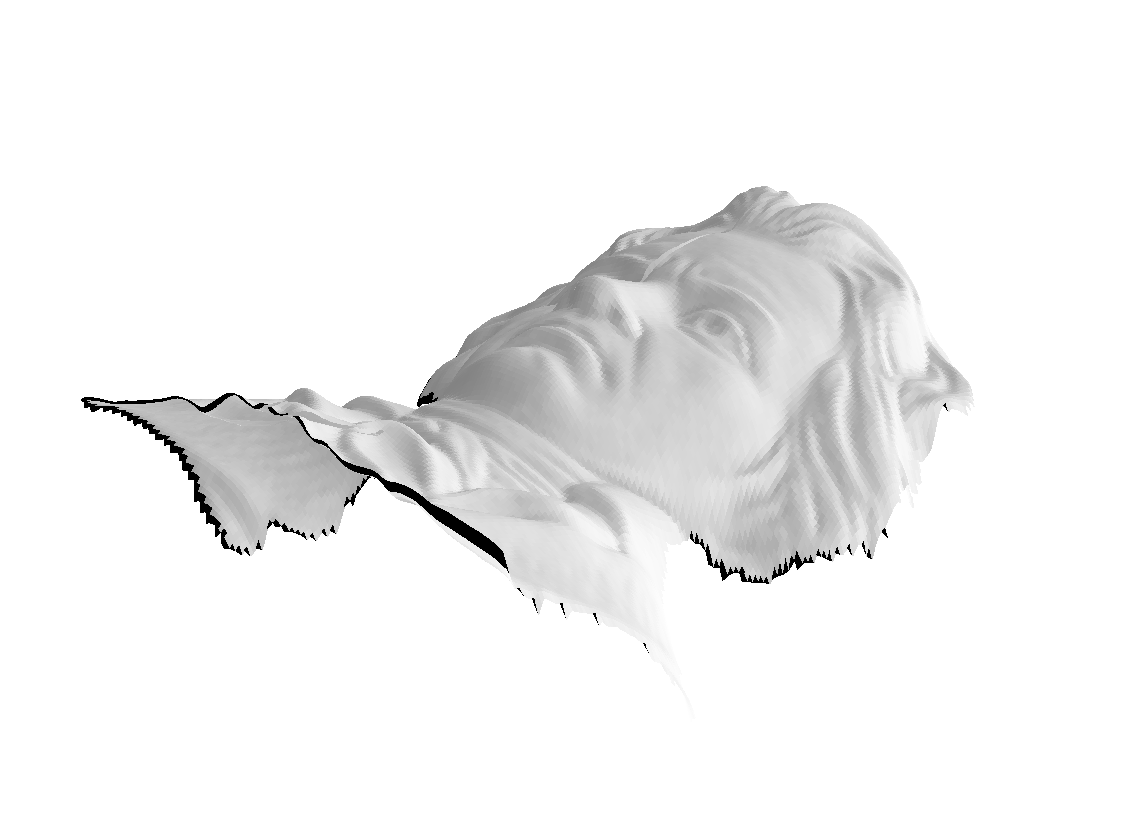

In [31]:
display_depth_matplotlib(np.rot90(np.rot90(np.rot90(output_out))))

(10, 3) (250, 200, 10) (250, 200) (10, 250, 200) 50000


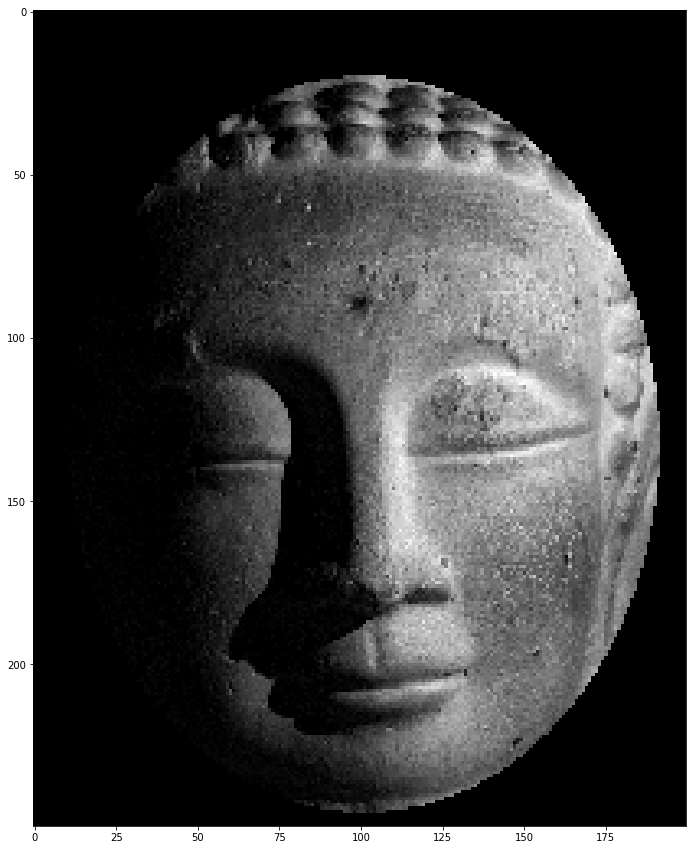

In [97]:
S = buddha['S']
mask = buddha["mask"][50:300,200:400]
budm = buddha["I"][50:300,200:400]
bsh = (budm.shape)

buddy = np.empty((bsh[2],bsh[0],bsh[1]))
print(S.shape, bsh, mask.shape, buddy.shape, bsh[0]*bsh[1])

for x in range(10):
    buddy[x,:,:] = np.copy(budm[:,:,x]*mask)
buddy.shape

plt.imshow(buddy[8], 'gray')
plt.show()

In [98]:
buddy = np.reshape(buddy, (10,bsh[0]*bsh[1]))
print(S.shape, Sinv.shape, dotpd.shape,p.shape,N.shape)
Sinv = lin.pinv(S)
dotpd = np.dot(Sinv, buddy)
p = lin.norm(dotpd, axis=0)
N = dotpd / p

print(Sinv.shape, dotpd.shape,p.shape,N.shape)

(10, 3) (3, 10) (3, 50000) (250, 200) (3, 250, 200)
(3, 10) (3, 50000) (50000,) (3, 50000)


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


(3, 250, 200) 150000
(250, 200)


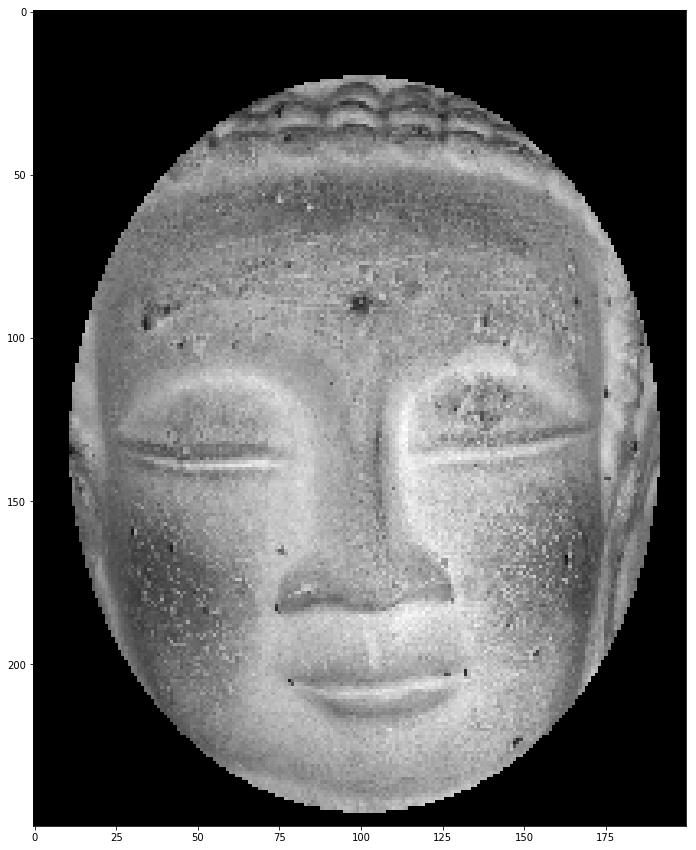

In [99]:
output = []

N = np.reshape(N, (3,bsh[0],bsh[1]))
print(N.shape, N.size)
output.append(N)

p = p.reshape((bsh[0],bsh[1]))
print(p.shape)
plt.imshow(p, 'gray')
plt.show()


/usr/local/lib/python3.6/site-packages/matplotlib/colors.py:489: RuntimeWarning: invalid value encountered in less
  np.copyto(xa, -1, where=xa < 0.0)
/usr/local/lib/python3.6/site-packages/matplotlib/colors.py:217: RuntimeWarning: invalid value encountered in less
  if np.any((result < 0) | (result > 1)):
/usr/local/lib/python3.6/site-packages/matplotlib/colors.py:217: RuntimeWarning: invalid value encountered in greater
  if np.any((result < 0) | (result > 1)):


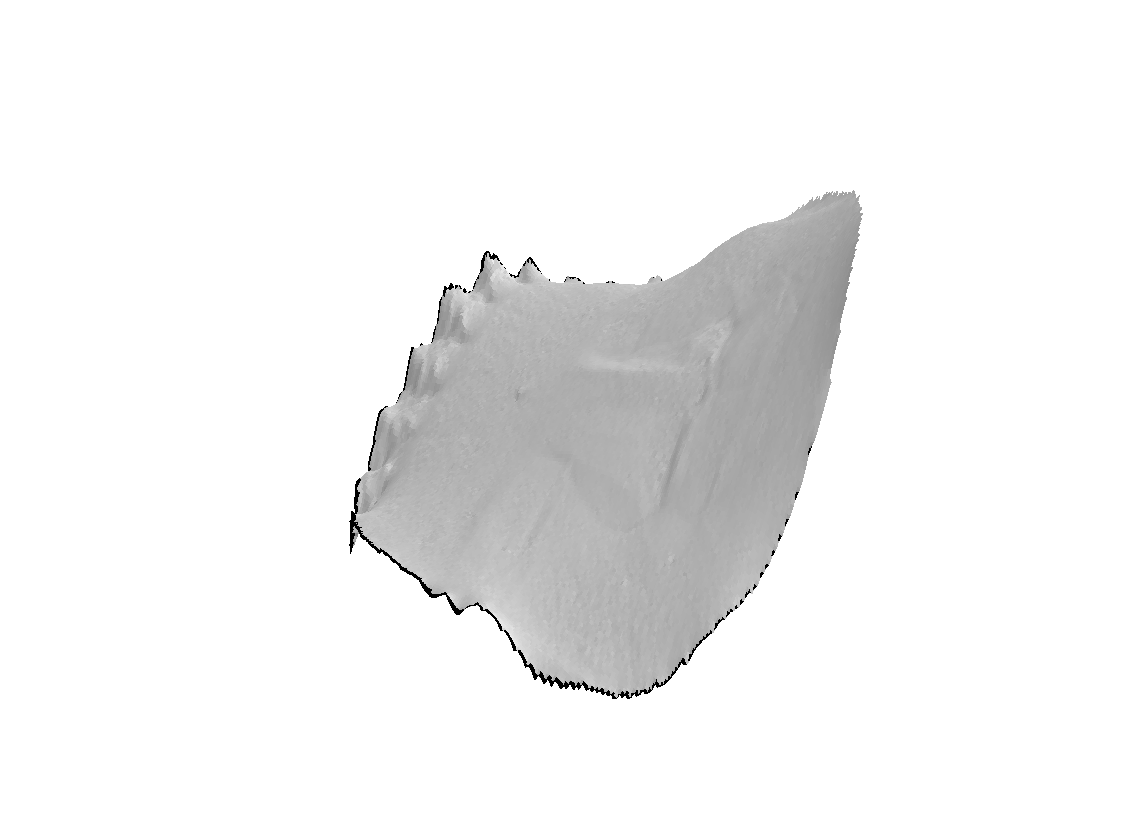

In [102]:
output_out = unbiased_integrate(N[0], N[1], N[2], mask, order=2)
display_depth_matplotlib(output_out)

/usr/local/lib/python3.6/site-packages/matplotlib/colors.py:489: RuntimeWarning: invalid value encountered in less
  np.copyto(xa, -1, where=xa < 0.0)
/usr/local/lib/python3.6/site-packages/matplotlib/colors.py:217: RuntimeWarning: invalid value encountered in less
  if np.any((result < 0) | (result > 1)):
/usr/local/lib/python3.6/site-packages/matplotlib/colors.py:217: RuntimeWarning: invalid value encountered in greater
  if np.any((result < 0) | (result > 1)):


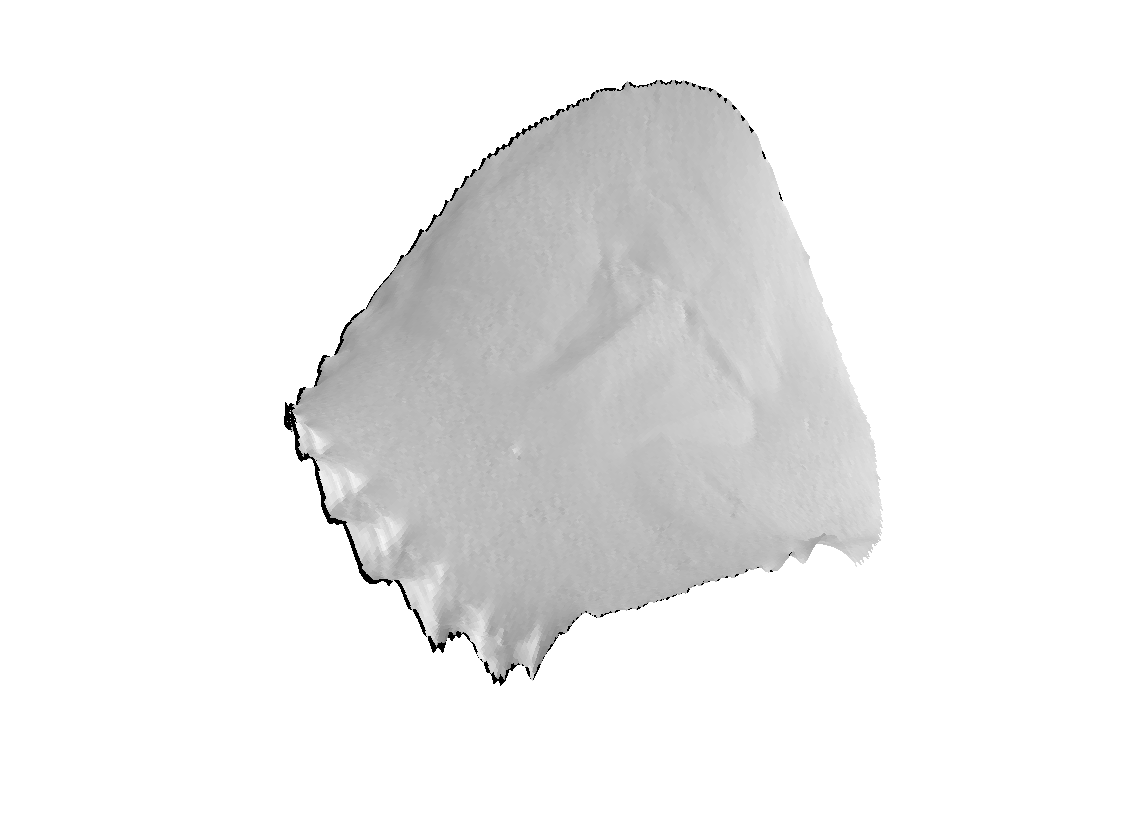

In [103]:
display_depth_matplotlib(np.rot90(output_out))

/usr/local/lib/python3.6/site-packages/matplotlib/colors.py:489: RuntimeWarning: invalid value encountered in less
  np.copyto(xa, -1, where=xa < 0.0)
/usr/local/lib/python3.6/site-packages/matplotlib/colors.py:217: RuntimeWarning: invalid value encountered in less
  if np.any((result < 0) | (result > 1)):
/usr/local/lib/python3.6/site-packages/matplotlib/colors.py:217: RuntimeWarning: invalid value encountered in greater
  if np.any((result < 0) | (result > 1)):


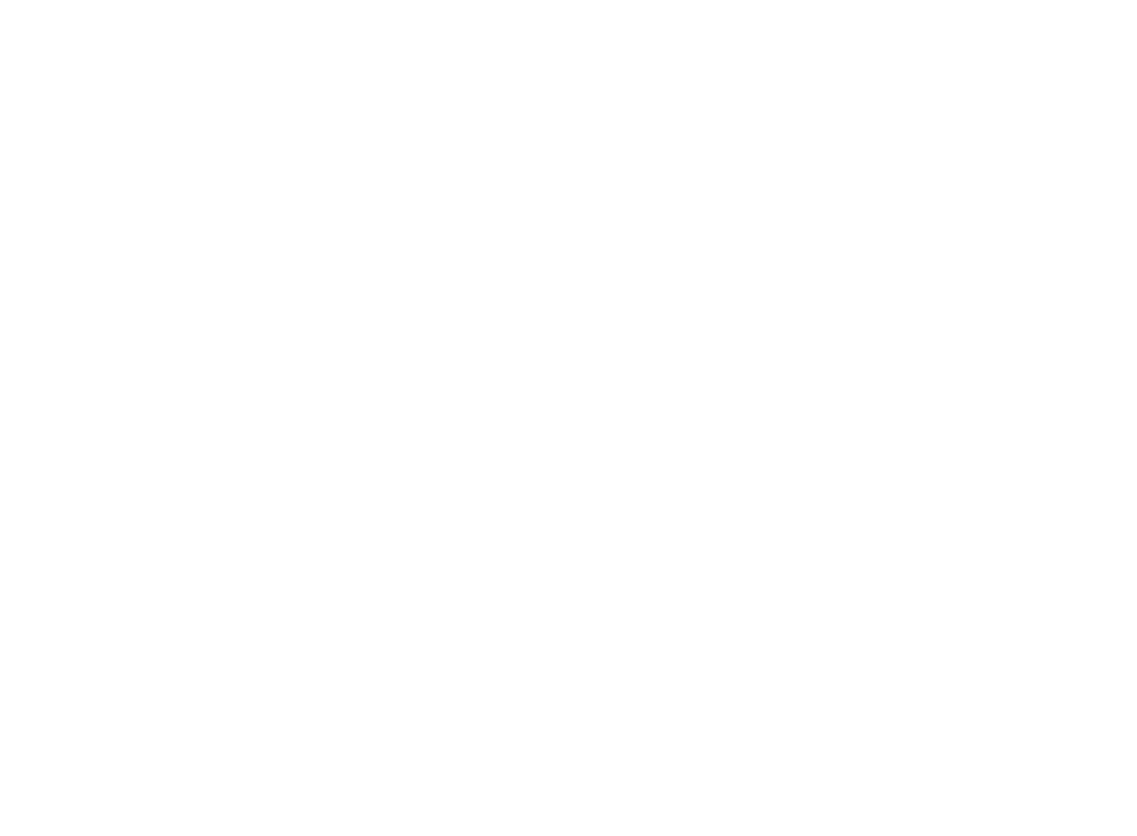

In [104]:
output_out = simchony_integrate(N[0], N[1], N[2], mask)
display_depth_matplotlib(output_out)